<a href="https://colab.research.google.com/github/Theetat-Saejaew/Cloud-Data-Pipeline/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_%5BStart%5D_R2DE2_WS2_Data_Cleansing_with_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# สำคัญ: ถ้าคุณเปิดไฟล์นี้จากลิงค์ในบทเรียนบนเว็บไซต์

# กรุณากด File > Save a Copy in Drive เพื่อก็อปปี้ไฟล์นี้ไปก่อน

---



# Workshop 2: Data Cleansing with Spark

ภาพรวมของคอร์สนี้

![alt text](https://cdn-std.droplr.net/files/acc_513973/z7Gqhs)

Workshop 2 นี้เราจะทำอะไรกันบ้าง

![alt text](https://cdn-std.droplr.net/files/acc_513973/SCN8wh)

![](https://file.designil.com/4Cc26a+)

## ลิงค์ดีมีประโยชน์

### 1. หน้าเว็บไซต์รวมคำสั่งทั้งหมดของ PySpark

หน้าเว็บไซต์นี้อัพเดทข้อมูลโดยทีมงาน Apache Spark พร้อมวิธีใช้ และคำอธิบายค่าต่าง ๆ ที่คำสั่งนั้นสามารถรับได้ สามารถค้นหาคำสั่งที่ต้องการได้ด้วย

https://spark.apache.org/docs/latest/api/python/reference/index.html

### 2. [ภาษาอังกฤษ] Spark Cheatsheet by DataCamp 

รวมคำสั่ง Spark

**RDD:**
https://www.datacamp.com/community/blog/pyspark-cheat-sheet-python 

**DataFrame:**
https://www.datacamp.com/community/blog/pyspark-sql-cheat-sheet

### 3. [ภาษาไทย] Spark Cheatsheet by DataTH

รวมคำสั่ง Spark พร้อมตัวอย่างโค้ด และคำอธิบายภาษาไทย

https://blog.datath.com/cheatsheet-pyspark/


---


# มาเริ่ม Workshop 2 กันเลย

![](https://file.designil.com/VrNxQe+)

# Step 1) ติดตั้ง Spark และ PySpark

Google Colab เป็นเครื่องมือสำหรับรันคำสั่ง Python และ Bash บนคอมพิวเตอร์จำลองที่ Google เตรียมไว้ให้เรา

คอมพิวเตอร์จำลองนี้เรียกว่า Virtual Machine (VM)

In [ ]:
!apt-get update                                                                          # อัพเดท Package ทั้งหมดใน VM ตัวนี้
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  # ติดตั้ง Java Development Kit (จำเป็นสำหรับการติดตั้ง Spark)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz # ติดตั้ง Spark 3.1.2
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz                                                  # Unzip ไฟล์ Spark 3.1.2
!pip install -q findspark==1.3.0                                                         # ติดตั้ง Package Python สำหรับเชื่อมต่อกับ Spark 

In [ ]:
# Set enviroment variable ให้ Python รู้จัก Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [ ]:
# ติดตั้ง PySpark ลงใน Python
!pip install pyspark==3.1.2

     |████████████████████████████████| 212.4 MB 68 kB/s 
     |████████████████████████████████| 198 kB 47.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880769 sha256=1a361ee998e8037b0d492a27cbe38af4ca5635e237ce8df60f1b4d5c117869fd
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


## ใช้งาน Spark

In [ ]:
# Server ของ Google Colab มีกี่ Core
!cat /proc/cpuinfo

ใช้ `local[*]` เพื่อเปิดการใช้งานการประมวลผลแบบ multi-core (Spark จะใช้ CPU ทุก core ที่อนุญาตให้ใช้งานในเครื่อง)

In [ ]:
# สร้าง Spark Session เพิ้อใช้งาน Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
# ดูเวอร์ชั่น Python
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0)

In [ ]:
# ดูเวอร์ชั่น Spark
spark.version

'3.1.2'

## Load Workshop 2 Data

คำอธิบายคำสั่ง:

wget = คำสั่งในการดาวน์โหลดไฟล์

wget -O = ตั้งชื่อไฟล์

In [ ]:
# Download Data File
!wget -O data.zip https://file.designil.com/zdOfUE+
!unzip data.zip

--2022-03-08 08:10:34--  https://file.designil.com/zdOfUE+
Resolving file.designil.com (file.designil.com)... 172.67.130.97, 104.21.8.81, 2606:4700:3031::6815:851, ...
Connecting to file.designil.com (file.designil.com)|172.67.130.97|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-std.droplr.net/files/acc_513973/zdOfUE [following]
--2022-03-08 08:10:35--  https://cdn-std.droplr.net/files/acc_513973/zdOfUE
Resolving cdn-std.droplr.net (cdn-std.droplr.net)... 13.226.219.43, 13.226.219.71, 13.226.219.82, ...
Connecting to cdn-std.droplr.net (cdn-std.droplr.net)|13.226.219.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6704411 (6.4M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   6.39M  39.3MB/s    in 0.2s    

2022-03-08 08:10:35 (39.3 MB/s) - ‘data.zip’ saved [6704411/6704411]

Archive:  data.zip
  inflating: ws2_data.csv            


### Load data ใส่ Spark

ใช้คำสั่ง `spark.read.csv` เพื่ออ่านข้อมูลจากไฟล์ CSV

Arguments:

Header = True << บอกให้ Spark รู้ว่าบรรทัดแรกในไฟล์ CSV เป็น Header

Inferschema = True << บอกให้ Spark พยายามเดาว่าแต่ละ column มี type เป็นอะไร [ ถ้าตั้งเป็น False, ทุก column จะถูกอ่านเป็น string (ตัวหนังสือ) ]

Reference: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrameReader.csv.html

In [ ]:
dt = spark.read.csv('/content/ws2_data.csv', header = True, inferSchema = True, )

---

![](https://file.designil.com/2c6qGS+)

# Step 2) Data Profiling

Data Profiling เป็นการทำความเข้าใจข้อมูลเบื้องต้น เพื่อที่เราจะได้รู้ว่าข้อมูลนี้มีคอลัมน์ไหนบ้าง ค่าโดยรวมเป็นอย่างไรบ้าง ฯลฯ เพื่อให้เราตัดสินใจได้ต่อว่าจะเช็คที่จุดไหนต่อไป

ตัวอย่าง: max, min, average, sum, มี missing value มั้ย ฯลฯ

In [ ]:
# ดูว่ามีคอลัมน์อะไรบ้าง
dt

DataFrame[timestamp: string, user_id: string, book_id: int, country: string, price: double]

> Columns:
1. timestamp
2. user_id
3. book_id
4. country
5. price

In [ ]:
# ดูข้อมูล
dt.show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [ ]:
# ดูข้อมูล 100 แถวแรก
dt.show(100)

In [ ]:
# ดูประเภทข้อมูลแต่ละคอลัมน์
dt.dtypes

[('timestamp', 'string'),
 ('user_id', 'string'),
 ('book_id', 'int'),
 ('country', 'string'),
 ('price', 'double')]

In [ ]:
# อีกคำสั่งในการดูข้อมูลแต่ละคอลัมน์ (Schema)
dt.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



nullable คือ ค่าสามารถเป็น null ได้





In [ ]:
# นับจำนวนแถวและ column
print((dt.count(), len(dt.columns)))

In [ ]:
# สรุปข้อมูลสถิติ
dt.describe().show()

In [ ]:
# อีกคำสั่งในการสรุปข้อมูลสถิติ
# ReferenceL: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.summary.html

dt.summary().show()

+-------+-------------------+-----------+-----------------+-------+------------------+
|summary|          timestamp|    user_id|          book_id|country|             price|
+-------+-------------------+-----------+-----------------+-------+------------------+
|  count|             500000|     499998|           500000| 500000|            500000|
|   mean|               null|   Infinity|       740.377786|   null|31.459311680039008|
| stddev|               null|        NaN|559.9366172146341|   null|10.945931459891705|
|    min|2021-05-01 00:00:04|   00000f49|                1|Algeria|               0.0|
|    25%|               null|2.4050123E7|              262|   null|             24.95|
|    50%|               null|  7.04742E7|              614|   null|             29.99|
|    75%|               null|  5.5726E81|             1217|   null|             34.99|
|    max|2021-07-31 23:59:55|   ffffe3e7|             2269|  Yemen|              84.0|
+-------+-------------------+-----------+--

In [ ]:
# สรุปข้อมูลสถิติเฉพาะ column ที่ระบุ
dt.select("price").describe().show()

### Exercise 1

คอลัมน์ไหนมี Missing Value บ้าง? และแสดงข้อมูลแถวที่มี Missing Value ให้ดูหน่อย



In [ ]:
# Answer here
dt.summary('count').show()


+-------+---------+-------+-------+-------+------+
|summary|timestamp|user_id|book_id|country| price|
+-------+---------+-------+-------+-------+------+
|  count|   500000| 499998| 500000| 500000|500000|
+-------+---------+-------+-------+-------+------+



In [ ]:
dt.where(dt.user_id.isNull()).show()

+-------------------+-------+-------+-------+-----+
|          timestamp|user_id|book_id|country|price|
+-------------------+-------+-------+-------+-----+
|2021-05-01 14:41:20|   null|    516| Brazil|27.37|
|2021-06-30 02:27:00|   null|   1390|  Japan|27.99|
+-------------------+-------+-------+-------+-----+



---

![](https://file.designil.com/D9H1d3+)

# Step 3) EDA - Exploratory Data Analysis

## Non-Graphical EDA

เราสามารถใช้คำสั่ง Spark ในการค้นหาข้อมูลที่ต้องการได้

In [ ]:
# ข้อมูลที่เป็นตัวเลข
dt.where(dt.price >= 1).show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [ ]:
# ข้อมูลที่เป็นตัวหนังสือ
dt.where(dt.country == 'Canada').show()

+-------------------+--------+-------+-------+-----+
|          timestamp| user_id|book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 14:50:52|3553ebbb|     14| Canada| 28.0|
|2021-05-01 00:01:09|b07799e7|     20| Canada| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20| Canada| 28.0|
|2021-05-01 10:01:44|c52587cc|     20| Canada| 28.0|
|2021-05-01 23:49:22|bfdfeeaf|     25| Canada|29.99|
|2021-05-01 14:59:03|29d98481|     30| Canada|14.95|
|2021-05-01 09:09:40|3668f113|     32| Canada|27.37|
|2021-05-01 18:46:21|1560dd3c|     33| Canada| 28.0|
|2021-05-01 09:47:19|96908d0d|     36| Canada|23.95|
|2021-05-01 14:57:06|a708a1be|     36| Canada|23.95|
|2021-05-01 15:05:55|1c489ab0|     36| Canada|23.95|
|2021-05-01 19:37:02|f9fa4aa7|     36| Canada|23.95|
|2021-05-01 06:28:07|350fb826|     39| Canada|31.47|
|2021-05-02 03:51:13|6c5822b1|     42| Canada|24.99|
|2021-05-01 13:32:34|9a3b0c50|     48| Canada| 31.5|
|2021-05-02 03:31:52|dd261c33|     49| Canada|

### Exercise 2: 
1. การซื้อทั้งหมดที่เกิดขึ้นในเดือนเมษายน มีกี่แถว
2. การซื้อทั้งหมดที่เกิดขึ้นในเดือนสิงหาคม มีกี่แถว

In [ ]:
# Answer here
dt.where( dt.timestamp.startswith("2021-04") ).count()

0

In [ ]:
dt.where( dt.timestamp.startswith("2021-08") ).count()

0

## Graphical EDA


Spark ไม่ได้ถูกพัฒนามาเพื่องาน plot ข้อมูล เพราะฉะนั้นเราจะใช้ package `seaborn` `matplotlib` และ `pandas` ในการ plot ข้อมูลแทน

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# แปลง Spark Dataframe เป็น Pandas Dataframe - ใช้เวลาประมาณ 6 วินาที spark จะใช้งานกับ bigdata ได้ดีกว่า
dt_pd = dt.toPandas()

In [ ]:
# ดูตัวอย่างข้อมูล
dt_pd.head()

,timestamp,user_id,book_id,country,price
0,2021-05-01 08:03:44,824dc295,2,Israel,24.95
1,2021-05-02 02:48:34,f80fe106,6,Thailand,31.49
2,2021-05-01 16:54:57,01cb9fe0,9,Italy,29.65
3,2021-05-01 21:45:28,59508f47,13,South Africa,22.40
4,2021-05-01 14:50:52,3553ebbb,14,Canada,28.00


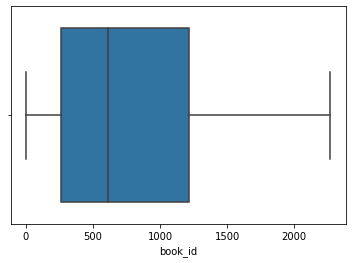

In [ ]:
# Boxplot - แสดงการกระจายตัวของข้อมูลตัวเลข
sns.boxplot(x = dt_pd['book_id'])

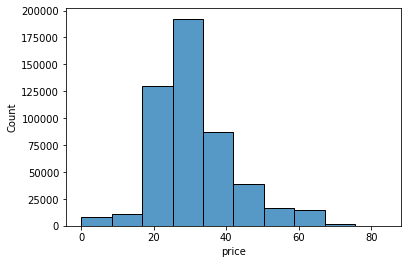

In [ ]:
# Histogram - แสดงการกระจายตัวของข้อมูลตัวเลข
# bins = จำนวน bar ที่ต้องการแสดง
sns.histplot(dt_pd['price'], bins=10)

### Exercise 3: 
book_id เพิ่มขึ้นตามราคาหรือเปล่า?

ลองสร้าง Plot เพื่อดูความสัมพันธ์ระหว่าง book_id กับ price

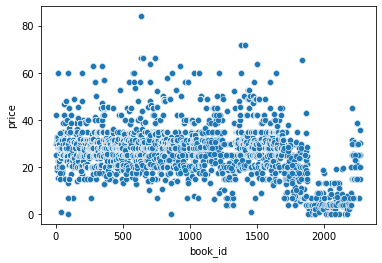

In [ ]:
# Answer here
# sns.scatterplot(x=dt_pd['book_id'], y=dt_pd['price'])
#sns.scatterplot(x=dt_pd.book_id, y=dt_pd.price)
sns.scatterplot(data=dt_pd, x='book_id', y='price')

#### Bonus: สร้าง interactive chart

In [ ]:
# Plotly - interactive chart
import plotly.express as px
fig = px.scatter(dt_pd, 'book_id', 'price')
fig.show()

---

![](https://file.designil.com/Huzkx0+)

# Step 4) Data Cleansing with Spark

มาทำความสะอาดข้อมูลด้วย Spark กันเถอะ

### แปลง Data Type

ปัญหาที่เจอบ่อยที่สุดแบบหนึ่งในข้อมูล คือ **Data Type ไม่ตรงกับที่เราต้องการ**

In [ ]:
# Show top 5 rows
dt.show(5)

+-------------------+--------+-------+------------+-----+
|          timestamp| user_id|book_id|     country|price|
+-------------------+--------+-------+------------+-----+
|2021-05-01 08:03:44|824dc295|      2|      Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|    Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|       Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|      Canada| 28.0|
+-------------------+--------+-------+------------+-----+
only showing top 5 rows



In [ ]:
# Show Schema
dt.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



จะเห็นว่า `Timestamp` ถูกอ่านเป็นข้อมูลตัวหนังสือ (String) แต่เราอยากให้มันเป็นข้อมูลวันที่และเวลา (date time) จะทำยังไงดี?

ก่อนอื่น เราต้องมาดูก่อนว่าคอลัมน์ Timestamp แสดงเลขวันที่ก่อน หรือเลขเดือนก่อน (DD/MM/YYYY หรือ MM/DD/YYYY)

In [ ]:
dt.select("timestamp").show(10)

+-------------------+
|          timestamp|
+-------------------+
|2021-05-01 08:03:44|
|2021-05-02 02:48:34|
|2021-05-01 16:54:57|
|2021-05-01 21:45:28|
|2021-05-01 14:50:52|
|2021-05-01 08:41:48|
|2021-05-01 05:51:43|
|2021-05-01 00:01:09|
|2021-05-01 00:21:24|
|2021-05-01 01:34:23|
+-------------------+
only showing top 10 rows



เราจะมาใช้ฟังก์ชั่น to_timestamp ซึ่งอยู่ใน pyspark.sql.functions กัน

Reference: https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.to_timestamp.html

In [ ]:
# แปลง string เป็น datetime
from pyspark.sql import functions as f

dt_clean = dt.withColumn("timestamp",
                        f.to_timestamp(dt.timestamp, 'yyyy-MM-dd HH:mm:ss')
                        )
dt_clean.show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [ ]:
dt_clean.printSchema()

root
 |-- timestamp: timestamp (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



## BONUS: ตัวอย่างการใช้ประโยชน์จากข้อมูล Datetime

In [ ]:
# นับยอด transaction ช่วงครึ่งเดือนแรก ของเดือนมิถุนายน
dt_clean.where( (f.dayofmonth(dt_clean.timestamp) <= 15) & ( f.month(dt_clean.timestamp) == 6 ) ).count()

81248

## Anomalies Check

ใช้ Spark ตามหาสิ่งที่ผิดปกติในข้อมูล

### ความผิดปกติ 1) Syntactical Anomalies
**Lexical errors** เช่น สะกดผิด

#### Exercise 4

หาชื่อประเทศที่สะกดผิด แล้วแก้ชื่อที่สะกดผิดให้ถูก

In [ ]:
# ใน Data set ชุดนี้ มีข้อมูลจากกี่ประเทศ
dt_clean.select("country").distinct().count()

58

In [ ]:
# แทนที่ ... ด้วยจำนวนประเทศ เพื่อดูรายชื่อประเทศทั้งหมด
# sort = ทำให้ข้อมูลเรียงตามตัวอักษร อ่านง่ายขึ้น
# show() ถ้าไม่ใส่ตัวเลขจะขึ้นมาแค่ 20 อัน และใส่ False เพื่อให้แสดงข้อมูลในคอลัมน์แบบเต็ม ๆ (หากไม่ใส่ คอลัมน์ที่ยาวจะถูกตัดตัวหนังสือ)
dt_clean.select("Country").distinct().sort("Country").show( 58, False )

+------------------------+
|Country                 |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Japane                  |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|

มาดูกันว่าประเทศที่ชื่อผิด มีข้อมูลหน้าตาเป็นอย่างไร

In [ ]:
# เปลี่ยน ... เป็นชื่อประเทศที่คุณคิดว่าผิด
dt_clean.where(dt_clean['Country'] == 'Japane').show()

+-------------------+--------+-------+-------+-----+
|          timestamp| user_id|book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 13:11:11|a904217a|   1129| Japane|29.65|
|2021-05-02 10:27:42|a6052e97|   1466| Japane| 35.0|
|2021-05-04 10:44:41|a0f44c26|   1497| Japane|17.49|
|2021-05-04 05:40:46|ad0f9907|   2269| Japane|35.71|
|2021-05-05 01:08:25|aa169f5d|   1378| Japane|59.93|
|2021-05-04 17:42:32|a28e3c68|   1411| Japane|29.99|
|2021-05-05 16:29:39|a909212e|   1652| Japane|24.99|
|2021-05-06 23:10:29|a7b05d98|   1420| Japane|30.79|
|2021-05-07 22:18:42|a169255e|   1459| Japane|25.08|
|2021-05-08 06:06:15|ab2159d6|   1035| Japane|22.67|
|2021-05-09 02:46:06|a6cba2fc|   1928| Japane|  7.0|
|2021-05-09 12:12:35|a0e31842|   1358| Japane|34.99|
|2021-05-11 16:33:19|a2bc5460|   1616| Japane|29.65|
|2021-05-12 22:32:52|af75e4d1|   1603| Japane|18.89|
|2021-05-12 19:14:33|a0accb45|   1934| Japane| 1.95|
|2021-05-13 05:23:12|abfe1e79|   1368| Japane|

ได้เวลาลองเปลี่ยนชื่อประเทศให้สะกดถูกต้อง

In [ ]:
# เปลี่ยน ... เป็นชื่อประเทศที่คุณคิดว่าผิด และ ...2 เป็นชื่อประเทศที่ถูกต้อง
from pyspark.sql.functions import when

dt_clean_country = dt_clean.withColumn("CountryUpdate", when(dt_clean['Country'] == 'Japane', 'Japan').otherwise(dt_clean['Country']))

In [ ]:
# ตรวจสอบข้อมูลที่แก้ไขแล้ว
dt_clean_country.select("CountryUpdate").distinct().sort("CountryUpdate").show(58, False)

+------------------------+
|CountryUpdate           |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|Netherlands             |
|

In [ ]:
# ดูหน้าตาข้อมูลตอนนี้
dt_clean_country.show()

+-------------------+--------+-------+--------------------+-----+--------------------+
|          timestamp| user_id|book_id|             country|price|       CountryUpdate|
+-------------------+--------+-------+--------------------+-----+--------------------+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|              Israel|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|            Thailand|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|               Italy|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|        South Africa|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|              Canada|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|United States of ...|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|United States of ...|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|              Canada|
|2021-05-01 00:21:24|9d2e93c8|     20|     

In [ ]:
# เอาคอลัมน์ CountryUpdate ไปแทนที่คอลัมน์ Country
dt_clean = dt_clean_country.drop("Country").withColumnRenamed('CountryUpdate', 'Country')

In [ ]:
# ดูหน้าตาข้อมูล
dt_clean.show()

+-------------------+--------+-------+-----+--------------------+
|          timestamp| user_id|book_id|price|             Country|
+-------------------+--------+-------+-----+--------------------+
|2021-05-01 08:03:44|824dc295|      2|24.95|              Israel|
|2021-05-02 02:48:34|f80fe106|      6|31.49|            Thailand|
|2021-05-01 16:54:57|01cb9fe0|      9|29.65|               Italy|
|2021-05-01 21:45:28|59508f47|     13| 22.4|        South Africa|
|2021-05-01 14:50:52|3553ebbb|     14| 28.0|              Canada|
|2021-05-01 08:41:48|ea28260a|     16|31.18|United States of ...|
|2021-05-01 05:51:43|ff44767e|     18|59.99|United States of ...|
|2021-05-01 00:01:09|b07799e7|     20| 28.0|              Canada|
|2021-05-01 00:21:24|9d2e93c8|     20| 28.0|             Hungary|
|2021-05-01 01:34:23|612db483|     20| 28.0|              Sweden|
|2021-05-01 01:42:10|afad01ae|     20| 28.0|              France|
|2021-05-01 03:38:00|3b68cda1|     20| 28.0|              Canada|
|2021-05-0

#### จบ Exercise 4

### ความผิดปกติ 2) Semantic Anomalies

**Integrity constraints**: ค่าอยู่นอกเหนือขอบเขตของค่าที่รับได้ เช่น
- user_id: ค่าจะต้องเป็นตัวเลขหรือตัวหนังสือ 8 ตัวอักษร

In [ ]:
# ดูว่าข้อมูล user_id ตอนนี้หน้าตาเป็นอย่างไร
dt_clean.select("user_id").show(10)

+--------+
| user_id|
+--------+
|824dc295|
|f80fe106|
|01cb9fe0|
|59508f47|
|3553ebbb|
|ea28260a|
|ff44767e|
|b07799e7|
|9d2e93c8|
|612db483|
+--------+
only showing top 10 rows



In [ ]:
# นับจำนวน user_id ทั้งหมด
dt_clean.select("user_id").count()

500000

#### Exercise 5

หาว่า user_id ตรงตามรูปแบบที่เราต้องการมั้ย และแทนที่ด้วยค่าที่ใกล้เคียงถ้าไม่ตรง

ดูว่า user_id ตรงตามรูปแบบที่เราต้องการ มีกี่แถว

คำใบ้: ใช้เว็บไซต์ https://www.regex101.com เพื่อสร้าง Regular Expression ตามรูปแบบที่เราต้องการ

In [ ]:
# แทนที่ ... ด้วย Regular Expression ของรูปแบบ user_id ที่เราต้องการ
# คำใบ้: ใน Regular Expression ที่เราต้องการ มี ^ นำหน้า และลงท้ายด้วย $
dt_clean.where(dt_clean["user_id"].rlike("^[a-z0-9]{8}$")).count()

499996

มาลองดูข้อมูลที่ไม่ถูกต้องบ้าง ว่าหน้าตาเป็นแบบไหน

![](https://file.designil.com/MmVhZf+)

In [ ]:
# คำเตือน: Cell นี้อาจจะใช้เวลาประมาณ 15 วินาที

# แทนที่ ... ด้วย Regular Expression ของรูปแบบ user_id ที่เราต้องการ
dt_correct_userid = dt_clean.filter(dt_clean["user_id"].rlike("^[a-z0-9]{8}$"))
dt_incorrect_userid = dt_clean.subtract(dt_correct_userid)

dt_incorrect_userid.show(10)

+-------------------+----------+-------+-----+--------------------+
|          timestamp|   user_id|book_id|price|             Country|
+-------------------+----------+-------+-----+--------------------+
|2021-05-01 14:41:20|      null|    516|27.37|              Brazil|
|2021-06-30 02:27:00|      null|   1390|27.99|               Japan|
|2021-06-19 16:00:22|ca86d17200|   2269|35.71|United States of ...|
|2021-07-15 18:53:09|ca86d17200|    322|30.79|United States of ...|
+-------------------+----------+-------+-----+--------------------+



มาทำการแก้ไข user_id นี้ให้ถูกต้องกันเถอะ (ตัวที่เป็น null ยังไม่ต้องแก้ไข)

In [ ]:
# แทนค่าที่ผิด ด้วยค่าที่ถูกต้อง (โค้ดจาก Exercise 4)
dt_clean_userid = dt_clean.withColumn("userid_update",
                                      when(dt_clean['user_id'] == 'ca86d17200' , 'ca86d172').otherwise(dt_clean['user_id'])
                                      )

In [ ]:
# ตรวจสอบผลลัพธ์
dt_correct_userid = dt_clean_userid.filter(dt_clean_userid["user_id"].rlike("^[a-z0-9]{8}$"))
dt_incorrect_userid = dt_clean_userid.subtract(dt_correct_userid)

dt_incorrect_userid.show(10)

+-------------------+----------+-------+-----+--------------------+-------------+
|          timestamp|   user_id|book_id|price|             Country|userid_update|
+-------------------+----------+-------+-----+--------------------+-------------+
|2021-05-01 14:41:20|      null|    516|27.37|              Brazil|         null|
|2021-06-19 16:00:22|ca86d17200|   2269|35.71|United States of ...|     ca86d172|
|2021-06-30 02:27:00|      null|   1390|27.99|               Japan|         null|
|2021-07-15 18:53:09|ca86d17200|    322|30.79|United States of ...|     ca86d172|
+-------------------+----------+-------+-----+--------------------+-------------+



In [ ]:
# เอาคอลัมน์ user_id_update ไปแทนที่ user_id (โค้ดจาก Exercise 4)
dt_clean = dt_clean_country.drop("user_id").withColumnRenamed('userid_update', 'user_id')

#### จบ Exercise 5

### ความผิดปกติ 3) Missing values

การเช็คและแก้ไข Missing Values (หากจำเป็น)

ค่า Missing Value คือ ค่าที่ว่างเปล่า

เราจะรู้ได้ยังไงว่าคอลัมน์ไหนมีค่าว่างเปล่ากี่ค่า

In [ ]:
# วิธีที่ 1 ในการเช็ค Missing Value
# ใช้เทคนิค List Comprehension - ทบทวนได้ใน Pre-course Python https://school.datath.com/courses/road-to-data-engineer-2/contents/6129b780564a8
# เช่น [ print(i) for i in [1,2,3] ]

# col = คำสั่ง Spark ในการเลือกคอลัมน์
# sum = คำสั่ง Spark ในการคิดผลรวม
from pyspark.sql.functions import col, sum

dt_nulllist = dt_clean.select([ sum(col(colname).isNull().cast("int")).alias(colname) for colname in dt_clean.columns ])
dt_nulllist.show()

+---------+-------+-----+-------+-------+
|timestamp|book_id|price|Country|user_id|
+---------+-------+-----+-------+-------+
|        0|      0|    0|      0|      2|
+---------+-------+-----+-------+-------+



In [ ]:
# วิธีที่ 2 ในการเช็ค Missing Value - จาก Exercise 1 โค้ดสะอาดกว่ามาก แต่ต้องมาบวกลบเอง
dt_clean.summary("count").show()

+-------+-------+------+-------+-------+
|summary|book_id| price|Country|user_id|
+-------+-------+------+-------+-------+
|  count| 500000|500000| 500000| 499998|
+-------+-------+------+-------+-------+



In [ ]:
# ดูช้อมูลว่าแถวไหนมี user_id เป็นค่าว่างเปล่า (โค้ดเดียวกับ Exercise 1)

dt_clean.where( dt_clean.user_id.isNull() ).show()

+-------------------+-------+-----+-------+-------+
|          timestamp|book_id|price|Country|user_id|
+-------------------+-------+-----+-------+-------+
|2021-05-01 14:41:20|    516|27.37| Brazil|   null|
|2021-06-30 02:27:00|   1390|27.99|  Japan|   null|
+-------------------+-------+-----+-------+-------+



#### Exercise 6:
ทางทีม Data Analyst แจ้งว่าอยากให้เราแทน user_id ที่เป็น NULL ด้วย 00000000 ไปเลย

In [ ]:
# Answer here
dt_clean_user_id = dt_clean.withColumn("userid_update",
                                      when(dt_clean.user_id.isNull() , '00000000').otherwise(dt_clean['user_id'])
                                      )



In [ ]:
dt_clean = dt_clean_user_id.drop("user_id").withColumnRenamed('userid_update', 'user_id')

In [ ]:
# เช็คว่า user ID ที่เป็น NULL หายไปแล้วจริงมั้ย
dt_clean.where( dt_clean.user_id.isNull() ).show()

+---------+-------+-----+-------+-------+
|timestamp|book_id|price|Country|user_id|
+---------+-------+-----+-------+-------+
+---------+-------+-----+-------+-------+



### ความผิดปกติ 4) Outliers:

ข้อมูลที่สูงหรือต่ำผิดปกติจากข้อมูลส่วนใหญ่

มาลองใช้ Boxplot ในการหาค่า Outlier ของราคาหนังสือ

In [ ]:
# Cell นี้จะรันค่อนข้างนาน เนื่องจากข้อมูลมีเยอะ
dt_clean_pd = dt_clean.toPandas()

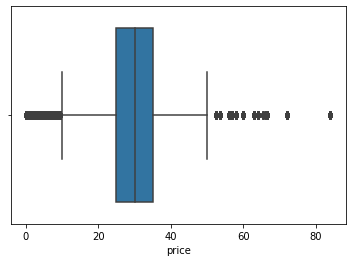

In [ ]:
sns.boxplot(x = dt_clean_pd['price'])

เห็นได้ว่ามีหนังสือบางเล่มที่ราคาสูงกว่าปกติไปเยอะมาก ลองมาดูกันว่าหนังสือ book_id อะไรบ้าง ที่ราคาเกิน $80

In [ ]:
dt_clean.where( dt_clean.price > 80 ).select("book_id").distinct().show()

+-------+
|book_id|
+-------+
|    635|
+-------+



เราสามารถนำ Book_ID อันนี้ไปเช็คต่อกับแหล่งข้อมูลได้ ว่าเป็นหนังสืออะไร และราคาเกิน $80 ผิดปกติมั้ย

ถ้าเอาไปเช็คในข้อมูลจาก Workshop 1 ก็จะพบว่า Book_ID = 635 คือ หนังสือชื่อ "The Power Broker"
https://www.audible.com/pd/The-Power-Broker-Audiobook/B0051JH67K?ipRedirectOverride=true&overrideBaseCountry=true&pf_rd_p=2756bc30-e1e4-4174-bb22-bce00b971761&pf_rd_r=MF7KC1JQF3A6GK2ET8XM

![](https://file.designil.com/7h1WIp+)

The Power Broker มีราคา $84 จริง และเป็นหนังสือเสียงที่มีความยาวถึง 66 ชั่วโมง

**ในที่นี้ ถือว่าเป็น Outlier จริง แต่ไม่ได้เป็นข้อมูลที่ผิด จึงไม่ต้องแก้อะไร**

### มาลอง Clean ข้อมูลด้วย Spark SQL

![alt text](https://cdn-std.droplr.net/files/acc_513973/881iHw)

In [ ]:
# แปลงข้อมูลจาก Spark DataFrame ให้เป็น TempView ก่อน
dt.createOrReplaceTempView("data")
dt_sql = spark.sql("SELECT * FROM data")
dt_sql.show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [ ]:
# ลองแปลงโค้ดสำหรับลิสต์ชื่อประเทศ Exercise 4 เป็น SQL
dt_sql_country = spark.sql("""
SELECT distinct country
FROM data
ORDER BY country
""")
dt_sql_country.show(100)

+--------------------+
|             country|
+--------------------+
|             Algeria|
|           Argentina|
|           Australia|
|             Austria|
|             Bahamas|
|             Belgium|
|              Brazil|
|              Canada|
|               China|
|            Colombia|
|             Croatia|
|             Denmark|
|               Dubai|
|               Egypt|
|             Estonia|
|             Finland|
|              France|
|             Germany|
|              Greece|
|             Hungary|
|               India|
|           Indonesia|
|             Ireland|
|              Israel|
|               Italy|
|             Jamaica|
|               Japan|
|              Japane|
|               Kenya|
|              Kuwait|
|            Malaysia|
|            Maldives|
|              Mexico|
|          Montenegro|
|         Netherlands|
|         New Zealand|
|             Nigeria|
|              Norway|
|            Pakistan|
|                Peru|
|         P

In [ ]:
# ลองแปลงโค้ดสำหรับแทนที่ชื่อประเทศ จาก Exercise 4 เป็น SQL
dt_sql_result = spark.sql("""
SELECT timestamp, user_id, book_id,
  CASE WHEN country = 'Japane' THEN 'Japan' ELSE country END AS country,
price
FROM data
""")
dt_sql_result.show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [ ]:
# เช็คผลลัพธ์ว่าถูกจริงมั้ย
dt_sql_result.select("country").distinct().sort("country").show(58, False)

#### Exercise 7

ทำ Exercise 5 ด้วย SQL

คำใบ้: ใช้คำสั่ง RLIKE ใน SQL เพื่อตรวจเช็ครูปแบบ Regular Expression ได้

In [ ]:
# Answer here: เช็คว่ามีข้อมูล user_id ที่ไม่เป็นตัวหนังสือหรือตัวเลข 8 หลักมั้ย
dt_sql_result = spark.sql("""
SELECT *
FROM data
WHERE user_id NOT RLIKE "^[a-z0-9]{8}$"
""")
dt_sql_result.show()

+-------------------+----------+-------+--------------------+-----+
|          timestamp|   user_id|book_id|             country|price|
+-------------------+----------+-------+--------------------+-----+
|2021-06-19 16:00:22|ca86d17200|   2269|United States of ...|35.71|
|2021-07-15 18:53:09|ca86d17200|    322|United States of ...|30.79|
+-------------------+----------+-------+--------------------+-----+



In [ ]:
# Answer here: แทนค่า (คำใบ้: ใช้ CASE WHEN)
dt_sql_uid_result = spark.sql("""
SELECT timestamp, 
CASE WHEN user_id = 'ca86d17200' THEN 'ca86d172' ELSE user_id END AS user_id, 
book_id, country, price
FROM data
""")
dt_sql_uid_result.show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [ ]:
# เช็คว่าข้อมูลที่ผิด หายไปหรือยัง
dt_sql_uid_result.where( dt_sql_uid_result.user_id == 'ca86d17200' ).show()

+---------+-------+-------+-------+-----+
|timestamp|user_id|book_id|country|price|
+---------+-------+-------+-------+-----+
+---------+-------+-------+-------+-----+



---

![](https://file.designil.com/TmpQfK+)

# Step 5) Save data เป็น CSV

โดยปกติแล้ว Spark จะทำการ Save ออกมาเป็นหลายไฟล์ เพราะใช้หลายเครื่องในการประมวลผล

In [ ]:
# เซฟเป็น partitioned files (ใช้ multiple workers)
dt_clean.write.csv('Cleaned_data.csv', header = True)

เราสามารถบังคับให้ Spark เซฟมาเป็นไฟล์เดียวได้

In [ ]:
# เซฟเป็น 1 ไฟล์ (ใช้ single worker)
dt_clean.coalesce(1).write.csv('Cleaned_Data_Single.csv', header = True)

ยังไม่จบแค่นี้ เรามีแถมอีกเรื่อง...

### Bonus: วิธีอ่านไฟล์ที่มีหลาย Part
เช่น กรณีนี้ที่เรามี
- /content/Cleaned_Data.csv/part-00000-....csv
- /content/Cleaned_Data.csv/part-00001-....csv

In [ ]:
all_parts = spark.read.csv('/content/Cleaned_data.csv/part-*.csv', header = True, inferSchema = True)

In [ ]:
all_parts.count()

500000

In [ ]:
print('จบ Workshop 2 แล้วคร้าบ 😍')

จบ Workshop 2 แล้วคร้าบ 😍
